In [1]:
%load_ext autoreload 
%autoreload 2

write abundance predictions as json files

In [9]:
from utils.helper_functions import * 

benchmark_dirs = ["Connecticut"]
ref_sets = [["Connecticut", "USA", "North_America"]]
start_dates = ["2020-01-01_till_2022-01-01", "2020-06-01_till_2022-01-01", "2021-01-01_till_2022-01-01", "2021-06-01_till_2022-01-01"]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

for ref_sts in  ref_sets:
    output_results_to_json_2_dirs( "0.1", ref_sts, start_dates, abundances, "AY.103_sequence")

/Users/ioanna/Projects/wastewater_analysis/utils/utils/plotting_functions.py:143: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  for ref_set, j in zip(dirs_and_refs[bench_dir], range(len(dirs_and_refs[bench_dir]))):


read abundance prediction

In [10]:
results = dict()

for dir_name in benchmark_dirs:
    results[dir_name] = dict()
    # load results
    with open("results.json") as json_file:
        results[dir_name] = json.loads(json_file.read())

calculate absolute errors

In [11]:
ref_sets_dict = dict()

for dir, ref_set_list in zip(benchmark_dirs, ref_sets):
    ref_sets_dict[dir] = ref_set_list

absolute_errors = calculate_absolute_errors_af(results, start_dates, abundances, ref_sets_dict, benchmark_dirs)

generate scatter plot

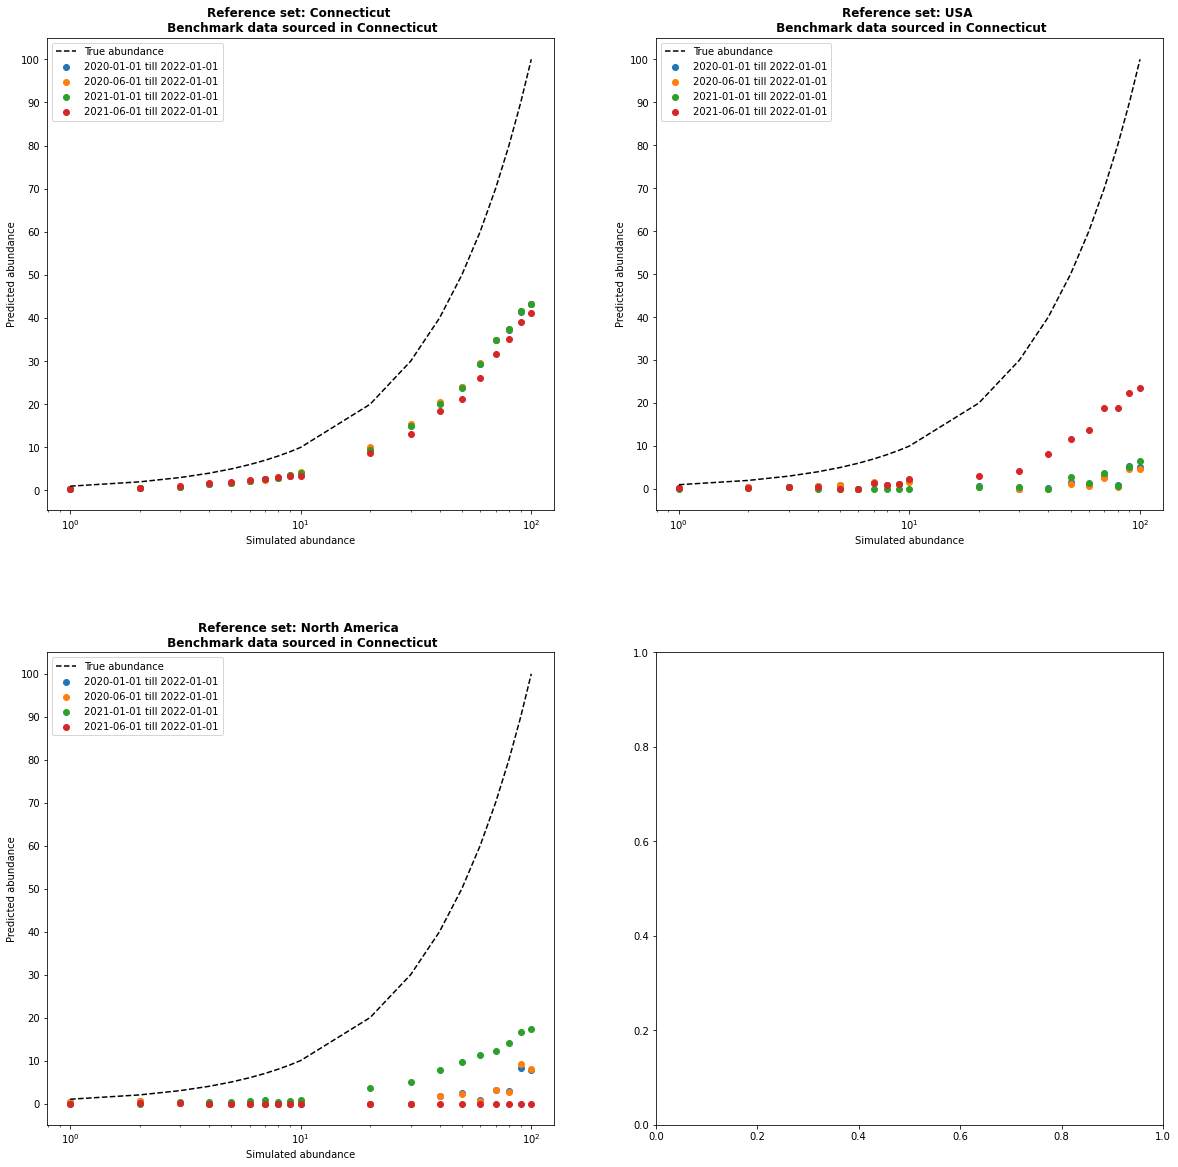

In [17]:
from utils.plotting_functions import *
if os.path.isdir("figures") != True:
    os.mkdir("figures")

ref_sets_per_dir = dict()
for dir, ref_set_l in zip(benchmark_dirs, ref_sets):
    ref_sets_per_dir[dir] = ref_set_l
plot_with_scatterplots_generic(abundances, start_dates, results, ref_sets_per_dir, "Connecticut")



output dataset info

In [ ]:
from utils.helper_functions import * 

dirs = ["Connecticut", "USA", "North_America"]
start_dates = ["2020-01-01_till_2022-01-01", "2020-06-01_till_2022-01-01", "2021-01-01_till_2022-01-01", "2021-06-01_till_2022-01-01"]

for ref_set in dirs:
    for dates in start_dates:
        path = "../../../data/Timeframe_Experiments/HPC/reference_sets/{}/{}".format(ref_set, dates)
        selection_path = "../../../data/Timeframe_Experiments/HPC/reference_sets/{}/{}/processed".format(ref_set, dates)
        output_dataset_info("AY.103", path, selection_path)

# merge csv per directory
for dir in dirs:
    merge_csv_from_subdirectory("../../../data/Timeframe_Experiments/HPC/reference_sets/{}".format(dir, dates), "Reference set", True)